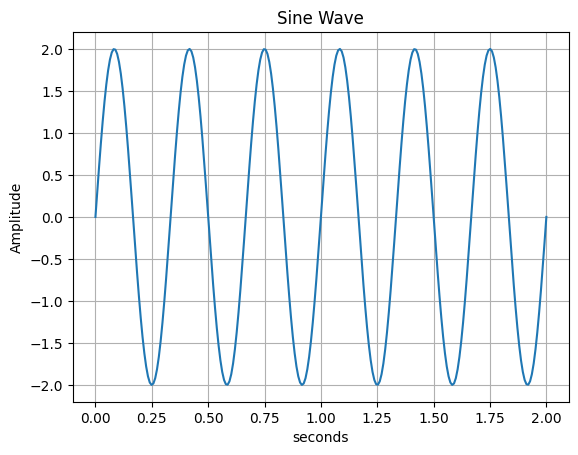

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 250) # Create an array of 250 points from 0 to 2

plt.plot(x, 2 * np.sin(2 * np.pi * 3 * x)) # Plot sine wave with frequency 3 and amplitude 2
plt.title("Sine Wave")
plt.xlabel("seconds")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

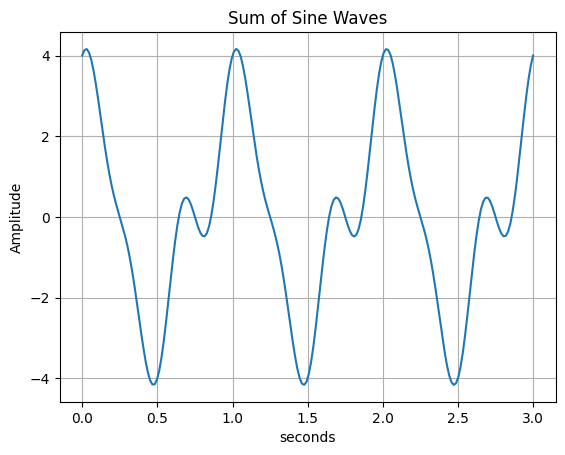

In [ ]:
x = np.linspace(0, 3, 200) # Create an array of 200 points from 0 to 3

plt.plot(x, 3 * np.cos(2 * np.pi * x) + np.sin(4 * np.pi * x) + np.cos(6 * np.pi * x)) # Plot sine wave with frequency 3 and amplitude 2
plt.title("Sum of Sine Waves")
plt.xlabel("seconds")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

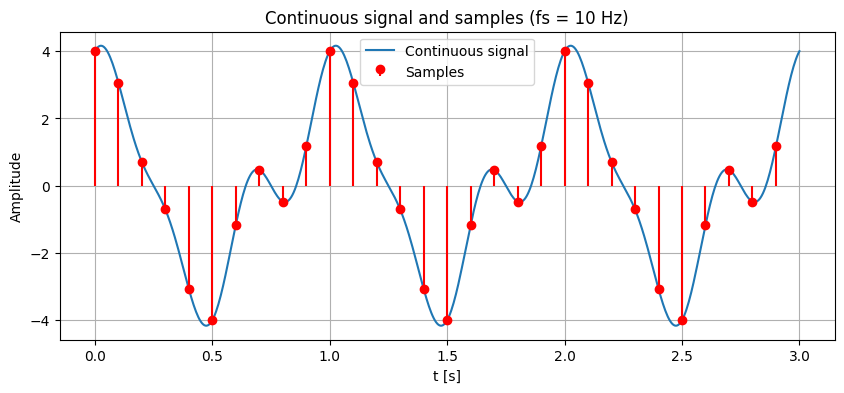

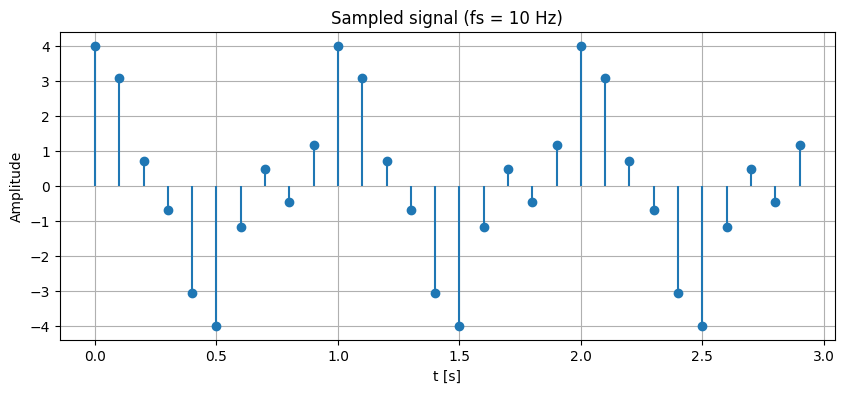

In [38]:
fs = 10
T = 1/fs

t = np.linspace(0, 3, 600)
y = 3*np.cos(2*np.pi*t) + np.sin(4*np.pi*t) + np.cos(6*np.pi*t)
n = np.arange(0, int(3*fs))
samples = 3*np.cos(2*np.pi*n*T) + np.sin(4*np.pi*n*T) + np.cos(6*np.pi*n*T)

plt.figure(figsize=(10,4))
plt.plot(t, y, label="Continuous signal")
plt.stem(n*T, samples, linefmt="r-", markerfmt="ro", basefmt=" ", label="Samples")
plt.title("Continuous signal and samples (fs = 10 Hz)")
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Samples only
plt.figure(figsize=(10,4))
plt.stem(n*T, samples, basefmt=" ")
plt.title("Sampled signal (fs = 10 Hz)")
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

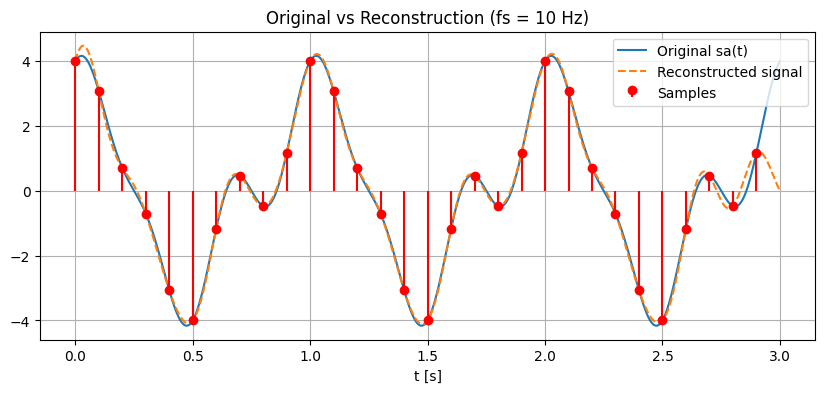

In [39]:
def reconstruct(sample_vals, fs, t_vals): # Sinc interpolation function
    T = 1 / fs # Sampling period
    reconstructed = np.zeros_like(t_vals) # Initialize reconstructed signal
    for i, t in enumerate(t_vals): # Loop over each time value
        for n, sample in enumerate(sample_vals): # Loop over each sample
            reconstructed[i] += sample * np.sinc((t_vals[i]- n*T) / T) # Sinc interpolation
    return reconstructed # Return reconstructed signal

reconstructed = reconstruct(samples, fs, t)

plt.figure(figsize=(10,4))
plt.plot(t, y, label="Original sa(t)")
plt.plot(t, reconstructed, "--", label="Reconstructed signal")
plt.stem(n*T, samples, linefmt="r-", markerfmt="ro", basefmt=" ", label="Samples")
plt.title("Original vs Reconstruction (fs = 10 Hz)")
plt.xlabel("t [s]")
plt.legend()
plt.grid(True)
plt.show()


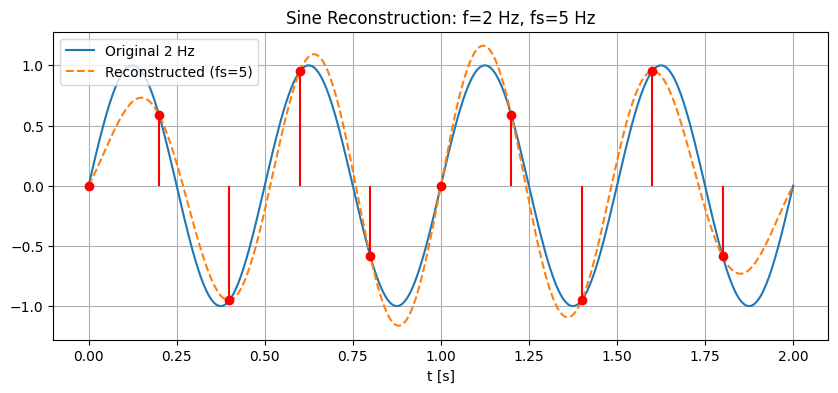

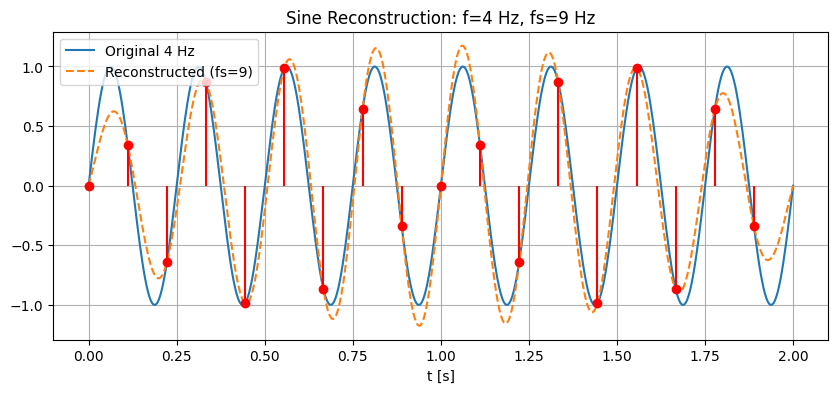

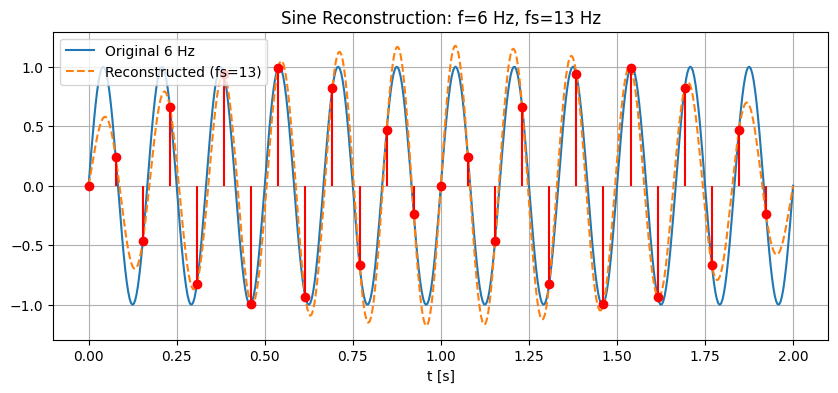

In [52]:
def sine_signal(t, f):
    return np.sin(2*np.pi*f*t)

def sine_sampling_experiment(f_signal, fs):
    t = np.linspace(0, 2, 500)
    T = 1/fs
    n = np.arange(0, int(2*fs))
    samples = sine_signal(n*T, f_signal)
    reconstructed = reconstruct(samples, fs, t)

    plt.figure(figsize=(10,4))
    plt.plot(t, sine_signal(t, f_signal), label=f"Original {f_signal} Hz")
    plt.plot(t, reconstructed, "--", label=f"Reconstructed (fs={fs})")
    plt.stem(n*T, samples, linefmt="r-", markerfmt="ro", basefmt=" ")
    plt.title(f"Sine Reconstruction: f={f_signal} Hz, fs={fs} Hz")
    plt.xlabel("t [s]")
    plt.grid(True)
    plt.legend()
    plt.show()

# Examples:
sine_sampling_experiment(2, 5)
sine_sampling_experiment(4, 9)
sine_sampling_experiment(6, 13)
